<h1 style="color: Blue;">TP2 : L’analyse en composantes principales</h1>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from affichage_acp import my_biplot
from scipy.io import loadmat

<h2>1 ACP : Exemple simple</h2>

<p><strong>1.1 Pre-etude des donnees</p>

Charger les donnees qui sont dans le tableau notes “notes.csv”. Pour cela on utilise la commande

In [3]:
X = np.transpose(pd.read_csv("notes.csv", delimiter=';',header=0 ,index_col=0))
print(X)

          math  scie  fran  lati  d-m 
jean       6.0   6.0   5.0   5.5   8.0
aline      8.0   8.0   8.0   8.0   9.0
annie      6.0   7.0  11.0   9.5  11.0
monique   14.5  14.5  15.5  15.0   8.0
didier    14.0  14.0  12.0  12.5  10.0
andreas   11.0  10.0   5.5   7.0  13.0
pierre     5.5   7.0  14.0  11.5  10.0
brigitte  13.0  12.5   8.5   9.5  12.0
evelyne    9.0   9.5  12.5  12.0  18.0


In [4]:
nomi = list(X.index)
nomv=list(X.columns)

In [5]:
print(X.columns)
print(nomi)

Index(['math', 'scie', 'fran', 'lati', 'd-m '], dtype='object')
['jean', 'aline', 'annie', 'monique', 'didier', 'andreas', 'pierre', 'brigitte', 'evelyne']


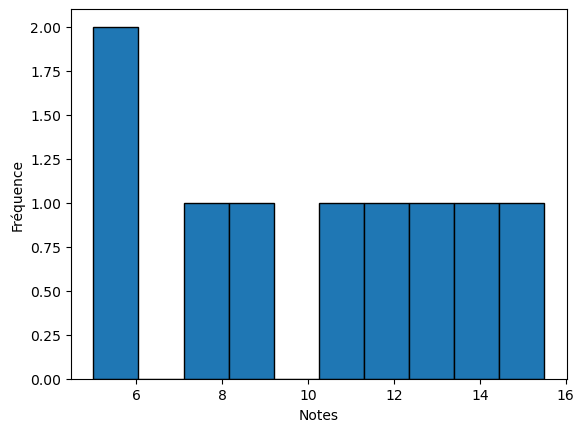

In [6]:
# Sélectionner la colonne correspondant à la matière "français"
francais_scores = X['fran']

# Représenter graphiquement la distribution des notes en français
plt.hist(francais_scores, bins=10, edgecolor='black')  
plt.xlabel('Notes')
plt.ylabel('Fréquence')
plt.show()

On remarque que dans l'histogramme que les barres ont la meme hauteur pour la frequence c'est assez logic sachant que si on regarde les notes il y a que une seule apparaissent de chaque note .

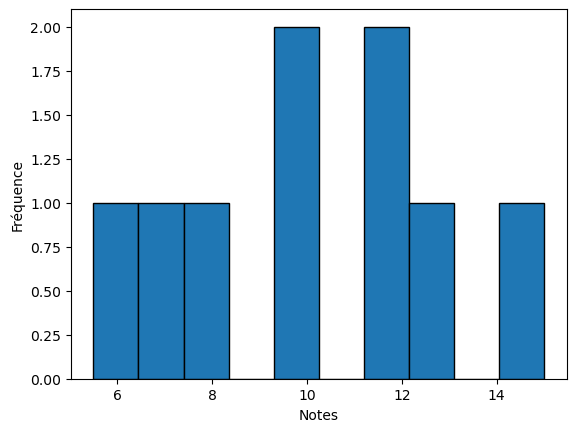

In [7]:
# Sélectionner la colonne correspondant à la matière "latin"
latin_scores = X['lati']

# Représenter graphiquement la distribution des notes en latin
plt.hist(latin_scores, bins=10, edgecolor='black')  
plt.xlabel('Notes')
plt.ylabel('Fréquence')
plt.show()

on remarque sur l'histogramme que on a plus de frequence dans les notes de latin qui veut dire plus de notes pareils

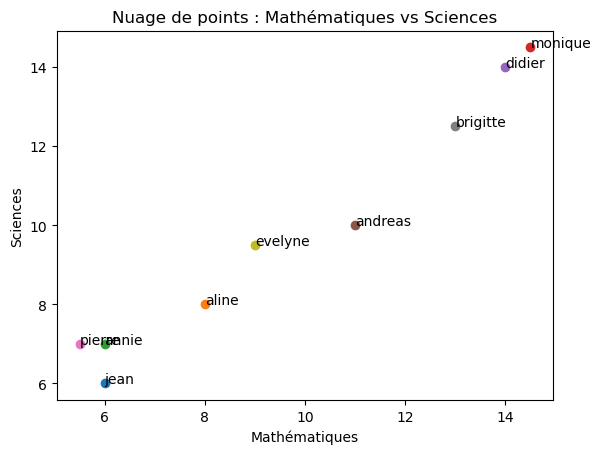

In [8]:
# Sélectionner la colonne correspondant à la matière "math et sciences"
data = X[['math', 'scie']]

# Supposons que nomi soit une variable contenant les noms des individus
nomi = X.index

# Représentation du nuage de points
for i in range(len(data)):
    plt.scatter(data.iloc[i, 0], data.iloc[i, 1])
    plt.text(data.iloc[i, 0], data.iloc[i, 1], nomi[i])

# Ajouter des labels et un titre
plt.xlabel('Mathématiques')
plt.ylabel('Sciences')
plt.title('Nuage de points : Mathématiques vs Sciences')

# Afficher le graphique
plt.show()


on voit que monique a les meilleurs notes en math et sciences alors que jean a les plus mauvaises 

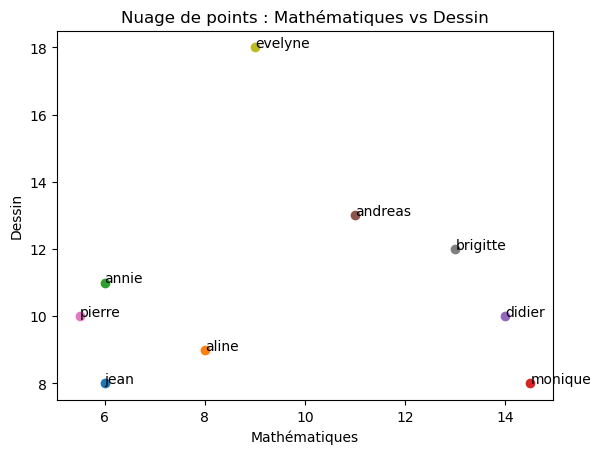

In [9]:
# Sélectionner la colonne correspondant à la matière "math et dessin"
data_1 = X[['math', 'd-m ']]

# Supposons que nomi soit une variable contenant les noms des individus
nomi = X.index

# Représentation du nuage de points
for i in range(len(data_1)):
    plt.scatter(data_1.iloc[i, 0], data_1.iloc[i, 1])
    plt.text(data_1.iloc[i, 0], data_1.iloc[i, 1], nomi[i])

# Ajouter des labels et un titre
plt.xlabel('Mathématiques')
plt.ylabel('Dessin')
plt.title('Nuage de points : Mathématiques vs Dessin')

# Afficher le graphique
plt.show()


si on compare les deux nuages de points on peut conclure que monique est plutot scientifique alors que evelyne est plutot artistique .

<h2>1.2 Calcul de l’ACP</h2>

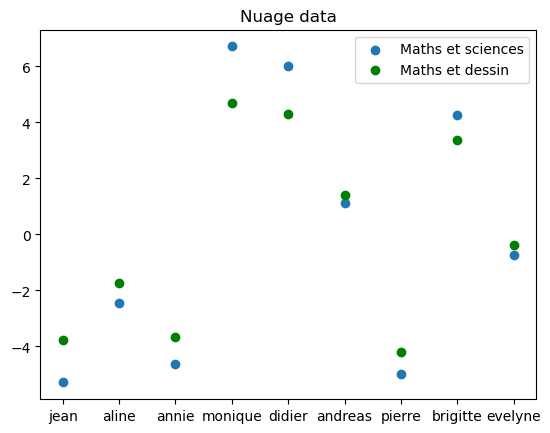

In [41]:
acp = PCA(n_components='mle')
acp2= PCA(n_components='mle')
cc = acp.fit_transform(data) ## cc contient les projections
cc2=acp2.fit_transform(data_1)
dataproj = acp.transform(data)
dataproj2=acp2.transform(data_1)
plt.title('Nuage data')

plt.scatter(nomi, dataproj, label='Maths et sciences');
plt.scatter(nomi, dataproj2,color='green', label='Maths et dessin');
plt.legend()

on compare un profile purement scientifique et un profile artistique.

<h2>1.3 Representation </h2>

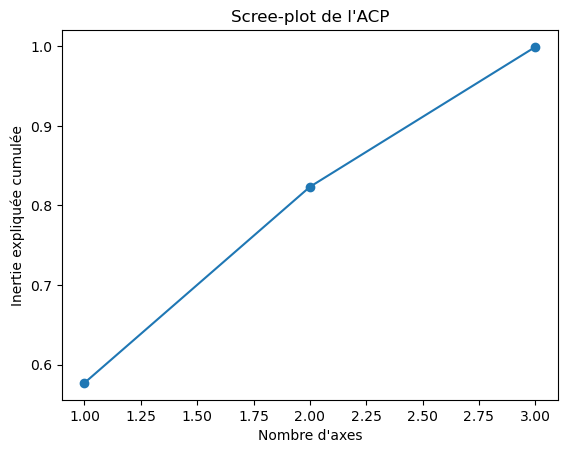

In [87]:
acp = PCA(3)
acp.fit(X)
# Calculer l'inertie expliquée cumulée 
cumulative_variance_ratio = np.cumsum(acp.explained_variance_ratio_)

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Nombre d\'axes')
plt.ylabel('Inertie expliquée cumulée')
plt.title('Scree-plot de l\'ACP')
plt.show()

explained_variance_ratio_ retourne le pourcentage de variance expliqué par chacun des composants sélectionnés

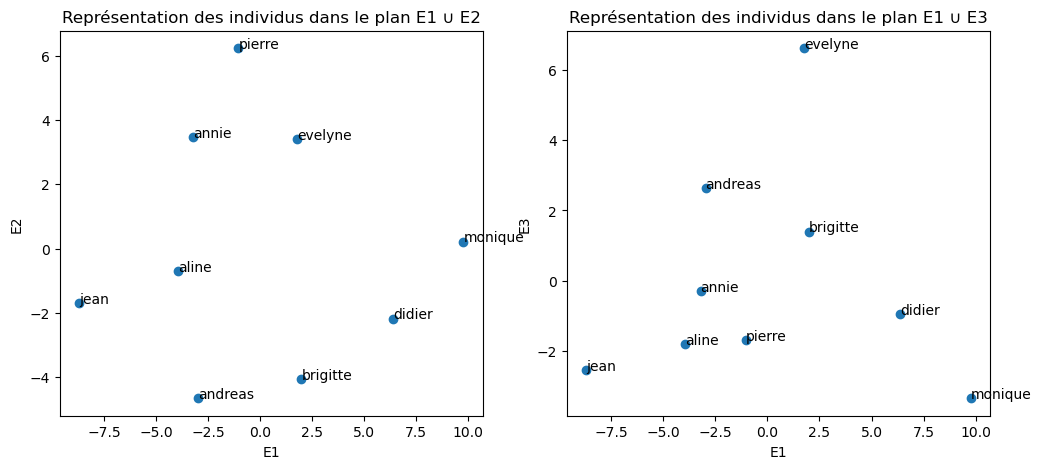

In [67]:
acp = PCA(n_components='mle')
cc = acp.fit_transform(X)
dataproj = acp.transform(X)
# Création des sous-plots pour E1 ∪ E2 et E1 ∪ E3
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# E1 ∪ E2
ax1.scatter(dataproj[:, 0], dataproj[:, 1])
ax1.set_xlabel('E1')
ax1.set_ylabel('E2')
ax1.set_title('Représentation des individus dans le plan E1 ∪ E2')

# Ajouter les labels des élèves
for i, nom in enumerate(nomi):
    ax1.annotate(nom, (dataproj[i, 0], dataproj[i, 1]))
    
# E1 ∪ E3
ax2.scatter(dataproj[:, 0], dataproj[:, 2])
ax2.set_xlabel('E1')
ax2.set_ylabel('E3')
ax2.set_title('Représentation des individus dans le plan E1 ∪ E3')

for i, nom in enumerate(nomi):
    ax2.annotate(nom, (dataproj[i, 0], dataproj[i, 2]))

plt.show()

In [57]:
# Convertir le DataFrame en un tableau NumPy
X_array = X.values

# Taille de l'échantillon
s = X_array.shape[0]

# Appliquer l'ACP
acp = PCA()
acp.fit(X_array)

# Nombre de variables initiales
p = X_array.shape[1]

# Calculer les corrélations entre les variables initiales et les composantes principales
correlations = np.zeros((p, p))

for k in range(p):
    for j in range(p):
        sigma_k_squared = np.var(X_array[:, k])  # Var(ζk)
        lambda_j = acp.explained_variance_[j]  # Valeur propre correspondant à la composante Yj
        correlation = acp.components_[j, k] * np.sqrt(s * lambda_j * sigma_k_squared)
        correlations[k, j] = correlation

# Afficher les corrélations
print("Corrélations entre les variables initiales et les composantes principales :")
print(correlations)

Corrélations entre les variables initiales et les composantes principales :
[[ 2.93688956e+01 -2.11553836e+01  1.61769641e+00 -4.57098333e-01
  -6.10808491e-01]
 [ 2.56452264e+01 -1.23012935e+01  4.03717041e-01  7.75881415e-01
   5.16537312e-01]
 [ 2.89210945e+01  2.49741321e+01 -3.50538784e+00  6.41443445e-01
  -4.49893127e-01]
 [ 2.30582870e+01  1.00541587e+01 -5.92308197e-01 -8.89654679e-01
   4.03231741e-01]
 [ 1.52501200e+00  3.67477221e+00  2.72886054e+01  4.75549159e-02
  -1.17896087e-02]]


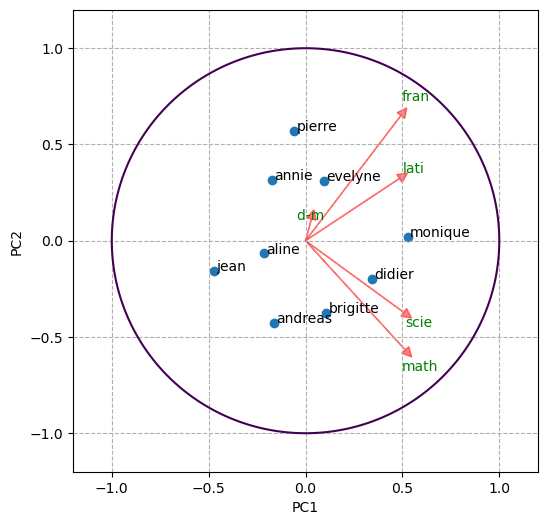

In [63]:
my_biplot(score=cc[:,0:2],coeff=np.transpose(acp.components_[0:2,:]),coeff_labels=nomv,score_labels=nomi,nomx="PC1",nomy="PC2")

<h2>2 Donnees reelles</h2>

In [74]:
imgtmp=loadmat("Indian_pines_corrected.mat")
img = np.float32(imgtmp['indian_pines_corrected'])
maptmp =loadmat("Indian_pines_gt.mat")
map = (maptmp['indian_pines_gt'])
#print(map)
#print(imgtmp)

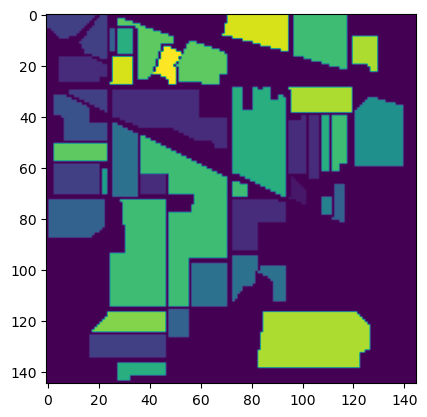

In [75]:
res =img[:,:,18]
plt.imshow((res-np.min(res))/(np.max(res)-np.min(res)))
plt.imshow(map)

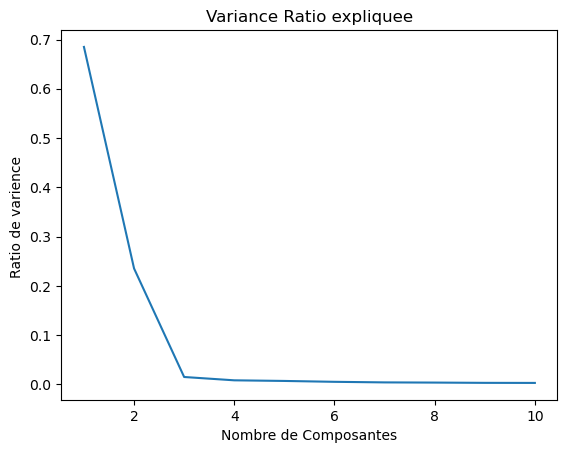

In [80]:
# Reformater l'image en un tableau de 145 × 145 lignes pour 200 colonnes (mesures)
img_reshaped = img.reshape((145 * 145, 200))

# Appliquer l'ACP
acp = PCA(n_components='mle')
cc = acp.fit_transform(img_reshaped)

plt.plot(range(1,10+1), acp.explained_variance_ratio_[:10])
plt.title("Variance Ratio expliquee")
plt.xlabel("Nombre de Composantes")
plt.ylabel("Ratio de varience ")

plt.show()

<p><strong>Q:</p><p>Evaluer combien d’axes sont n´ecessaires pour conserver une grande partie de l’information. Que
    pouvez-vous conclure sur l’information initiale .</p>
<p><strong>R:</p><p> si on utilise la methode de coude on a 3 axes necessaires<p>

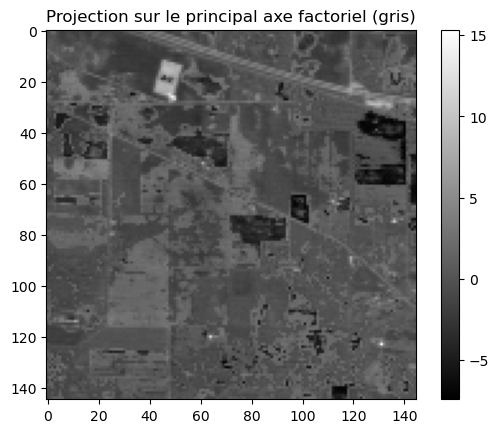

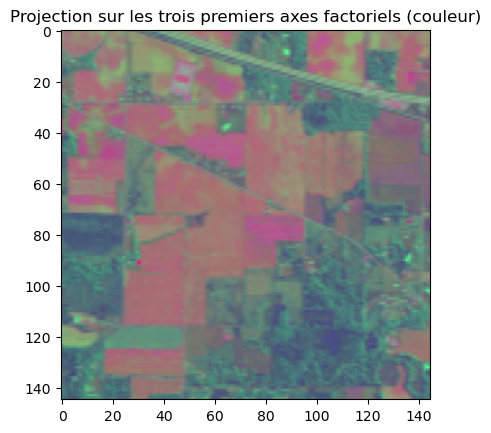

In [84]:
# la projection sur le principal axe factoriel
principal_component_projection = dataproj[:, 3]

# Reformater la projection en une image de niveaux de gris
gray_image = principal_component_projection.reshape((145, 145))

# Visualiser la projection sur le principal axe factoriel 
plt.imshow(gray_image, cmap='gray')
plt.title('Projection sur le principal axe factoriel (gris)')
plt.colorbar()
plt.show()

# les projections sur les trois premiers axes factoriels
color_image_projections = dataproj[:, :3]

# Reformater les projections en une image couleur
color_image = color_image_projections.reshape((145, 145, 3))
# Normaliser l'image couleur
normalized_color_image = (color_image - np.min(color_image)) / (np.max(color_image) - np.min(color_image))

# visualisation
plt.imshow(normalized_color_image)
plt.title('Projection sur les trois premiers axes factoriels (couleur)')
plt.show()

on voit l'apparition des formes de l'image indian_pines dans notre projection sur les trois premiers aces factoriels.

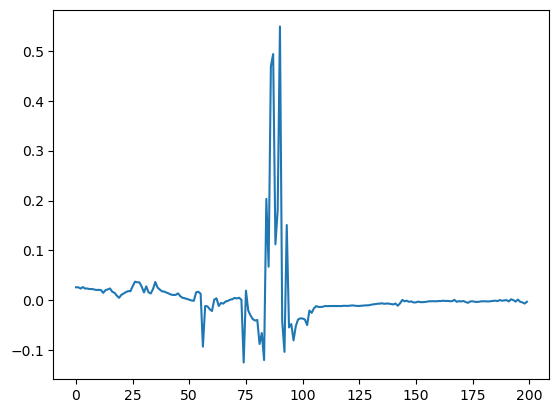

In [86]:
plt.plot(acp.components_[k,:])

Cette visualisation nous permet de voir comment chaque longueur d'onde contribue à la composante principale.